# dev2 pde-sim
Tim Tyree

In [1]:
import sys, os, time, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.special import kn
sys.path.append(os.path.abspath('../pde-sim-transfer/'))
from pde_sim_worker import *
import pde_sim_worker_hill as hill

from pde_sim_grid_scan import *
# import test_cases

# load the autoreload extension
%load_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

In [2]:
beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
print('notebook is at: ' + nb_dir)

transfer_dir = f"{nb_dir}/../pde-sim-transfer"
os.chdir(transfer_dir)

notebook is at: /Users/timothytyree/Documents/GitHub/radial_cell_motion/pde-sim/nb


# unhelpful RK4 implementation
runge-kutte-4.  numerical time steps for sharp changes are not handled at time scales of dt=0.01 --> not worth it for pde-sim

In [3]:
import numpy as np
k = 1
def f(t,y):
    '''time_step for decay of x at a rate k modulated with sinusoidal source.'''
    return -k*(y+np.sin(t/(2*np.pi)))

In [6]:
def time_step_rk4(t,y,h,f):
    '''runge-kutta-4 explicit time step.'''
    k1 = f(t,y)
    k2 = f(t+h/2, y+h*k1/2)
    k3 = f(t+h/2, y+h*k2/2)
    k4 = f(t+h,y+h*k3)
    dcdt = (k1+2*k2+2*k3+k4)/6
    return dcdt

In [36]:
assert(f(2,3).all())
# assert()
retval = time_step_rk4(2,3,.01,f)


In [37]:
retval

-2.462787961200638

In [33]:
.1/15

0.006666666666666667

In [3]:
# retval = 
print(time_step_rk4(2,3,.05,f)-f(2,3))

NameError: name 'time_step_rk4' is not defined

In [ ]:
#DONE: copy to the cloud!
#DONE: run on the cloud!!
#DONE: test mg source
#DONE: make df from output

# grid_search record

In [5]:
#test case
save_fn = 'test.csv'
df = grid_to_df(
    kgrid=[0.02],
    Lgrid=[100.0],
    c0grid=[4],
    Tgrid=[21,10],
    itnogrid=[2],
    dtgrid=[0.005],
    trgrid=[10],
)
df.to_csv(save_fn, header=False,sep=' ', index=False)
shutil.copy(save_fn, save_fn.split('.')[0]+'.dat')
os.remove(save_fn)

In [6]:
kgrid = np.geomspace(10**-4,10**0,5*4)
Lgrid = np.geomspace(10**0,10**3,5*4)
c0grid= list(np.arange(0,7))
c0grid.append(12)
c0grid.append(20)
c0grid.append(30)
c0grid= np.array(c0grid)
print(f"making a (Nk,NL,Nc0) = {kgrid.size}x{Lgrid.size}x{c0grid.size} grid search.")
sample_size = kgrid.size*Lgrid.size*c0grid.size
ert = sample_size*1.5 #minutes
print(f"""estimated run time would be {ert:2.2f} minutes with 1cpu,
{ert/10:2.2f} minutes with 10cpu,
{ert/100:2.2f} minutes with 100cpu,
{ert/1000:2.2f} minutes with 1000cpu""")

making a (Nk,NL,Nc0) = 20x20x10 grid search.
estimated run time would be 6000.00 minutes with 1cpu,
600.00 minutes with 10cpu,
60.00 minutes with 100cpu,
6.00 minutes with 1000cpu


In [8]:
#run 1 ert 6 minutes with 1000 cpus.  20x20x10 grid search
df = grid_to_df(
    kgrid=kgrid,
    Lgrid=Lgrid,
    c0grid=c0grid,
    Tgrid=[21,10],
    itnogrid=[8],
    dtgrid=[0.0005],
    trgrid=[10],
)
save_fn = 'run_4.csv'
df.to_csv(save_fn, header=False,sep=' ', index=False)
shutil.copy(save_fn, save_fn.split('.')[0]+'.dat')
os.remove(save_fn)

In [32]:
#start another run to probe period/background dependence
# same kgrid and Lgrid
kgrid = np.geomspace(10**-4,10**0,5*4)
Lgrid = np.geomspace(10**0,10**3,5*4)
c0grid = [0,2,3,3.5,4,5]
Tgrid = [12, 16, 19, 24]
df = grid_to_df(
    kgrid=kgrid,
    Lgrid=Lgrid,
    c0grid=c0grid,
    Tgrid=Tgrid,
    itnogrid=[4],
    dtgrid=[0.005],
    trgrid=[10],
)
save_fn = 'run_5.csv'
df.to_csv(save_fn, header=False,sep=' ', index=False)
shutil.copy(save_fn, save_fn.split('.')[0]+'.dat')
os.remove(save_fn)

In [34]:
#start another run to probe period/background dependence
# same kgrid and Lgrid
kgrid = np.geomspace(10**-4,10**0,5*4)
Lgrid = np.geomspace(10**0,10**3,5*4)
[0,2,3,3.5,4,5]
c0grid = [6,8,10,12, 20, 30]
Tgrid = [12, 16, 19, 24]
df = grid_to_df(
    kgrid=kgrid,
    Lgrid=Lgrid,
    c0grid=c0grid,
    Tgrid=Tgrid,
    itnogrid=[4],
    dtgrid=[0.005],
    trgrid=[10],
)
save_fn = 'run_6_prime.csv'
df.to_csv(save_fn, header=False,sep=' ', index=False)
shutil.copy(save_fn, save_fn.split('.')[0]+'.dat')
os.remove(save_fn)

In [22]:
print("current length of Tc0grid")
print(len([0,2,3,3.5,4,5,6,7,8,9,10,11,12, 20, 30, 40, 70, 100])*4)
print("target length of Tc0grid")
print(len([0,2,3,3.5,4,5,6,7,8,9,10,11,12, 20, 30, 40, 70, 100])*4/2.88)

current length of Tc0grid
72
target length of Tc0grid
25.0


In [30]:
print("potential length of Tc0grid")
len([0,2,3,3.5,4,5])*4

potential length of Tc0grid


24

# make grid search .dat files that use Hill degradation models from Bader (2007)

In [4]:
kgrid = np.geomspace(10**-4,10**0,5*4)
Lgrid = np.geomspace(10**0,10**3,5*4)
print(kgrid.size)
print(Lgrid.size)
20*20

20
20


400

In [4]:
%%time
#start another run to probe period/background dependence
# same kgrid and Lgrid
kgrid = np.geomspace(10**-4,10**0,5*4)
Lgrid = np.geomspace(10**0,10**3,5*4)
c0grid = [0,1,2,3,4,5,6, 12, 20, 70]
Tgrid = [21]
df = grid_to_df(
    kgrid=kgrid,
    Lgrid=Lgrid,
    c0grid=c0grid,
    Tgrid=Tgrid,
    itnogrid=[4],
    dtgrid=[0.005],
    trgrid=[10],
    modegrid = [1,7,4],
)
save_fn = 'run_Hill_1a.csv'
df.to_csv(save_fn, header=False,sep=' ', index=False)
shutil.copy(save_fn, save_fn.split('.')[0]+'.dat')
os.remove(save_fn)

#start another run to probe period/background dependence
# same kgrid and Lgrid
kgrid = np.geomspace(10**-4,10**0,5*4)
Lgrid = np.geomspace(10**0,10**3,5*4)
c0grid = [0,1,2,3,4,5,6, 12, 20, 70]
Tgrid = [10]
df = grid_to_df(
    kgrid=kgrid,
    Lgrid=Lgrid,
    c0grid=c0grid,
    Tgrid=Tgrid,
    itnogrid=[4],
    dtgrid=[0.005],
    trgrid=[10],
    modegrid = [1,7,4],
)
save_fn = 'run_Hill_1b.csv'
df.to_csv(save_fn, header=False,sep=' ', index=False)
shutil.copy(save_fn, save_fn.split('.')[0]+'.dat')
os.remove(save_fn)

CPU times: user 214 ms, sys: 7.74 ms, total: 221 ms
Wall time: 224 ms


In [41]:
#QUICK FIX to max job submision size, use multiple submits
len(df.c0.values)

24000

# bash task automation

# scp the whole pde-sim-transfer folder to the open science grid

In [43]:
!scp 

usage: scp [-346BCpqrv] [-c cipher] [-F ssh_config] [-i identity_file]
           [-l limit] [-o ssh_option] [-P port] [-S program] source ... target


In [51]:
os.chdir(nb_dir)
!sudo ./synch_whole_transfer.sh

Password:


In [ ]:
#!/usr/bin/bash
scp -r ../pde-sim-transfer TimtheTyrant@login05.osgconnect.net:~
scp -r TimtheTyrant@login05.osgconnect.net:~/pde-sim-transfer ../pde-sim-transfer 



# debugging hill degradation simulation

In [56]:
#initialize
#  make the mesh
r0   = 50. #um
Lr   = 1000.#um
dr   = 1.  #um
dt   = 0.0005#sec 
rmesh= np.arange(r0,Lr+dr,dr)
c    = 0.*rmesh
#  define default parameters
F0   = 10**4
D    = 100.#um^2/s
ds   = 0.1/15#nM/µm
kPDE = 1
# @np.vectorize
def get_Hill_degradation_term(c,pde,kPDE,b,h):
    '''let overall scale of degradation still vary as kPDE.'''
#     return -kPDE*np.divide(np.multiply(pde,c**(h-1.)),(b**h+c**h)) if c>0 else 0
    boo = c>0
    out = 0*c
    out[boo] = -kPDE*np.divide(np.multiply(pde[boo],c[boo]**(h-1.)),(b**h+c[boo]**h))
    return out

# initialize with numpy signatures to speed up to about twice the previous run time (original mode==0 case) 
mesh_size = len(rmesh)
degrade = np.vectorize(lambda c,pde:get_Hill_degradation_term(c,pde,kPDE=kPDE,b=b,h=h),
    signature = f"({mesh_size}),({mesh_size})->({mesh_size})")


In [59]:
%%time
for i in range(100):
    time_step(c=c, pde=c, rmesh=rmesh, D=D, kPDE=.2, dr=dr, fluxLeft=0, fluxRight=0)

CPU times: user 9.92 ms, sys: 1.39 ms, total: 11.3 ms
Wall time: 10.1 ms


In [60]:
%%time
for i in range(100):
    hill.time_step(c=c, pde=c, rmesh=rmesh, D=D, kPDE=.2, dr=dr, h=h, b=b, degrade=degrade(c,c), fluxLeft=0, fluxRight=0)

CPU times: user 22.4 ms, sys: 1.28 ms, total: 23.7 ms
Wall time: 22.5 ms


In [62]:
# retval =     hill.time_step(c=rmesh, pde=c+1, rmesh=rmesh, D=D, kPDE=.2, dr=dr, h=h, b=b, fluxLeft=0, fluxRight=0)
# print(retval)

## time step of 0.005 appears valid

In [71]:
%%time 
retval = hill.simulate(kPDE=0.2, LPDE=100, c0=4, T=10, iter_no=2, dt=0.0005, time_res=10, mode='PDE1')

Printing Inputs:
kPDE:0.2 LPDE:100 c0:4 T:10 iter_no:2 dt:0.0005 time_res:10 mode:PDE1

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
0,6.13741,-0.53333,-0.50000,-0.58333,-0.50000,-0.36667,0.00000
1,8.43336,-0.76667,-0.75000,-0.79167,-0.75000,-0.68333,0.00000
CPU times: user 8min 46s, sys: 299 ms, total: 8min 46s
Wall time: 8min 47s


In [70]:
%%time 
retval = hill.simulate(kPDE=0.2, LPDE=100, c0=4, T=10, iter_no=2, dt=0.005, time_res=10, mode='PDE1')

Printing Inputs:
kPDE:0.2 LPDE:100 c0:4 T:10 iter_no:2 dt:0.005 time_res:10 mode:PDE1

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
0,6.13740,-0.53333,-0.50000,-0.58333,-0.50000,-0.36667,0.00000
1,8.43335,-0.76667,-0.75000,-0.79167,-0.75000,-0.68333,0.00000
CPU times: user 54.6 s, sys: 79.2 ms, total: 54.6 s
Wall time: 54.7 s


In [69]:
%%time 
retval = hill.simulate(kPDE=0.2, LPDE=100, c0=4, T=10, iter_no=2, dt=0.01, time_res=10, mode='PDE1')

Printing Inputs:
kPDE:0.2 LPDE:100 c0:4 T:10 iter_no:2 dt:0.01 time_res:10 mode:PDE1

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
0,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CPU times: user 23 s, sys: 52.9 ms, total: 23 s
Wall time: 23 s


In [ ]:
%%time 
retval = hill.simulate(kPDE=0.2, LPDE=100, c0=4, T=10, iter_no=2, dt=0.00005, time_res=10, mode='PDE1')

Printing Inputs:
kPDE:0.2 LPDE:100 c0:4 T:10 iter_no:2 dt:5e-05 time_res:10 mode:PDE1

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800


In [ ]:
beep(3)

# TODO: b.o.e. estimate for how much faster cython (or using a numpy signature) would need to make the degradation term about as fast as the original degradation term. 39/9 ~= 4

In [103]:
# @np.vectorize
# def get_Hill_degradation_term(kPDE,c,b,h,pde):
# 	'''let overall scale of degradation still vary as kPDE.'''
# 	return -kPDE*np.divide(np.multiply(pde,c**(h-1.)),(b**h+c**h)) if c>0 else 0

In [5]:
#test case for hill degradation term
h=0.8
c = np.arange(50,1000,1)
b = 0.75
assert(len(list(hill.get_Hill_degradation_term(1,c,1,1,c)))==len(list(c)))

# TODO: stamp a given file with my kaboudian's stamp with my details using python 
* DONE: checked if an easy solution obviously exists.
* TODO: copy Kaboudian's stamp below,
* TODO: update the date and time automatically
* TODO: insert stamp into the !touch test.meh 
 -- don't overwrite a shebang if it exists
 -- replace any preexisting stamp, don't make two!
* TODO: add CLI<br>
* TODO: add option for recursive execution<br>
* TODO: put it all in !mkdir ~/Tasks and alias it to be called by 
!stamp -r path/to/folder/
!stamp file_name "test description"
!stamp file_name
^that last one should default to the current description or no description

### TODO(black hat task): trivialize target executables recursively
- make a similar command line interface to prepend the do-nothing shebang to a given file
- make a command that (recursively) finds all executables that I have write permissions to.

# simplify the time step for wouter

In [8]:
from numba import njit

In [9]:
from scipy.special import kn
import numpy as np

In [18]:
from ...pde_sim_worker import *

ImportError: attempted relative import with no known parent package

In [22]:
T = 12
r0   = 50. #um
Lr   = 1000.#um
dr   = 1.  #um
c0 = 4 # nM
LPDE = 100 #um
Ts   = np.multiply(T,60.)#period of signal in seconds
rmesh= np.arange(r0,Lr+dr,dr)

#  define default parameters
F0   = 10**4
D    = 100.#um^2/s
ds   =(0.1/15) #critical gradient of cell
dt = 0.0001

c = c0+0.*rmesh
pde = kn(0,rmesh/LPDE)/kn(0,r0/LPDE)#cons

kPDE = 0.02
D = 
kPDE, LPDE, c0, T, iter_no, dt, time_res

source_fn = 'mg_source_1987.csv'

In [24]:
#  precompute realistic periodic camp signaling
t_list  = np.around(np.arange(0,Ts+dt,dt),4)
spl     = import_mg_source(period=T)
dsource = evaluate_mg_source(spl, t_list)
phi     = lambda t: F0*dsource[np.around(t,4)]/rmesh[0]

#cylindrical FEM with localized PDE decay
# define b.c.'s in units of slope #concentration difference per time step
fluxLeft = lambda t:phi(t%Ts)
fluxRight= 0./rmesh[-1]


In [25]:
time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(0.005), fluxRight=0)


NameError: name 'kPDE' is not defined

In [3]:
from pde_sim_returns_camp import *



`python3 pde_sim_returns_camp.py 0.02 100.0 4.0 10.0 2.0 0.005 10.0`
where 
- kPDE = 0.02/sec, 
- D = 100µm^2/sec, 
- c0 = 4.0nM, 
- T=10.0min, 
- iter_no = 2.0 # the number of pulses to integrate (tmax = iter_no*T)
- dt = 0.005sec
- time_res = 10.0min # the frequency data is printed.

# computing number of molecules as a function of time for constant fluxLeft
7.12.2020

In [6]:
!python3 pde_sim_returns_camp.py 0.02 100.0 4.0 10.0 2.0 0.005 10.0


Printing Inputs:
kPDE:0.02 LPDE:100.0 c0:4.0 T:10 iter_no:2 dt:0.005 time_res:10

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
^C
Traceback (most recent call last):
  File "pde_sim_returns_camp.py", line 216, in <module>
    retval = simulate(kPDE=kPDE, LPDE=LPDE, c0=c0, T=T, iter_no=iter_no, dt=dt, time_res = time_res)
  File "pde_sim_returns_camp.py", line 159, in simulate
    dcdt = time_step(c, pde, rmesh, D, kPDE, dr, fluxLeft(time))
  File "pde_sim_returns_camp.py", line 98, in time_step
    termBC = np.hstack([ fluxLeft , 0*c[1:-1] , fluxRight ])
  File "//anaconda3/lib/python3.7/site-packages/numpy/core/shape_base.py", line 335, in hstack
    arrs = [atleast_1d(_m) for _m in tup]
  File "//anaconda3/lib/python3.7/site-packages/numpy/core/shape_base.py", line 335, in <listcomp>
    arrs = [atleast_1d(_m) for _m in tup]
  File "//anaconda3/lib/python3.7/site-packages/numpy/core/shape_base.p

In [29]:
# kPDE     = 0.
# LPDE     = 100.0
# c0       = 4.0
# T        = 10.0
# iter_no  = 2.0
# dt       = 0.005
# time_res = 10.0

retval = simulate(kPDE=0., LPDE=100.0, c0=4.0, T=10.0, iter_no=2.0, dt=0.005, time_res = 10.0, use_constant_fluxLeft=True);



Printing Inputs:
kPDE:0.0 LPDE:100.0 c0:4.0 T:10.0 iter_no:2.0 dt:0.005 time_res:10.0

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
0,16.03449,-1.00000,-0.98333,-0.93333,-0.85000,-0.73333,-0.13333
1,28.06466,-1.00000,-0.99167,-0.96667,-0.92500,-0.86667,-0.56667
the final radial cAMP field is:
cAMP=
[240.86192842 238.88212557 236.94116076 235.037562   233.16993994
 231.33698157 229.53744502 227.77015414 226.03399441 224.32790814
 222.65089133 221.00198937 219.38029464 217.7849426  216.21511008
 214.67001164 213.14889839 211.6510546  210.175797   208.72247157
 207.29045321 205.87914269 204.48796668 203.11637478 201.76383987
 200.42985519 199.11393503 197.81561177 196.53443685 195.26997788
 194.02181977 192.78956187 191.57281935 190.37122026 189.18440713
 188.01203403 186.85376836 185.70928782 184.5782824  183.46045134
 182.35550523 181.26316295 180.18315394 179.11521501 178.05909284
 177.01454071 1

In [30]:
c = retval

#  make the mesh
r0   = 50. #um
Lr   = 1000.#um
dr   = 1.  #um
Ts   = np.multiply(T,60.)
#period of signal in seconds
rmesh= np.arange(r0,Lr+dr,dr)


In [31]:
dA = np.array([2*np.pi*dr*r + np.pi*dr**2 for r in rmesh])
cnet = np.add.reduce(np.dot(c,dA))

ValueError: shapes (2,240004) and (951,) not aligned: 240004 (dim 1) != 951 (dim 0)

In [33]:
beep(3)

0

In [34]:
cnet_values, t_values = retval

# constant flux yields constant increase of net cAMP

In [65]:
from pde_sim_returns_camp import *
cnet_values,t_values = simulate(kPDE=0., 
                                LPDE=100.0, 
                                c0=0.0, 
                                T=10.0, 
                                iter_no=2.0, 
                                dt=0.005, 
                                time_res = 10.0, 
                                use_constant_fluxLeft=True);

Printing Inputs:
kPDE:0.0 LPDE:100.0 c0:0.0 T:10.0 iter_no:2.0 dt:0.005 time_res:10.0

Printing Outputs including mean cell direction (mcd):
cycle_no,mean_c,mcd_at_100,mcd_at_200,mcd_at_300,mcd_at_400,mcd_at_500,mcd_at_800
0,12.03028,-1.00000,-0.98333,-0.93333,-0.85000,-0.73333,-0.13333
1,24.06045,-1.00000,-0.99167,-0.96667,-0.92500,-0.86667,-0.56667
the final radial cAMP field is:
cAMP=
[236.86192842 234.88212557 232.94116076 231.037562   229.16993994
 227.33698157 225.53744502 223.77015414 222.03399441 220.32790814
 218.65089133 217.00198937 215.38029464 213.7849426  212.21511008
 210.67001164 209.14889839 207.6510546  206.175797   204.72247157
 203.29045321 201.87914269 200.48796668 199.11637478 197.76383987
 196.42985519 195.11393503 193.81561177 192.53443685 191.26997788
 190.02181977 188.78956187 187.57281935 186.37122026 185.18440713
 184.01203403 182.85376836 181.70928782 180.5782824  179.46045134
 178.35550523 177.26316295 176.18315394 175.11521501 174.05909284
 173.01454071 1

In [68]:
x_values = t_values
y_values = cnet_values
print(f"$dc_net(t)/dt$ = {np.mean(np.diff(y_values))/np.mean(np.diff(x_values))} nM µm^2 / sec.")

$dc_net(t)/dt$ = 62952.05542761571 nM µm^2 / sec.


where
$$c_\text{net}(t) = \sum_{r=r_0=50\mu m}^{1000\,\mu m}c(r,t)\bigg(2\pi r dr + \pi dr^2   \bigg)$$

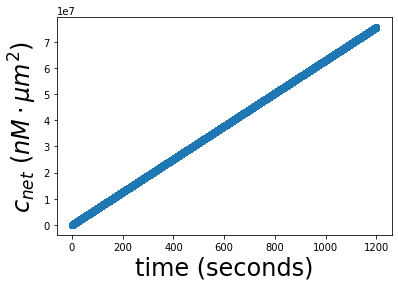

In [69]:
plt.scatter(x=x_values, y=y_values)
plt.xlabel('time (seconds)', fontsize=24)
plt.ylabel('$c_{net}$ ($nM\cdot µm^2$)', fontsize=24)
plt.show()

In [43]:
print(f"cAMP rate of change is {np.mean(np.diff(y_values))/np.mean(np.diff(x_values))}.")


cAMP rate of change is 62952.05542761527.
